In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def calculate_fov(focal_length_mm, sensor_width_mm=36):  # Full-frame default
    """Calculate horizontal field of view (degrees)"""
    fov_rad = 2 * np.arctan(sensor_width_mm / (2 * focal_length_mm))
    fov_deg = np.degrees(fov_rad)
    return fov_deg

In [3]:
image_data = [
    {"file": "35mm.png", "focal_length": 35},
    {"file": "50mm.png", "focal_length": 50},
    {"file": "85mm.png", "focal_length": 85}
]


In [4]:
results = []
images = []
for data in image_data:
    f = data["focal_length"]
    img_path = data["file"]

    fov = calculate_fov(f)
    results.append({"Image": img_path, "Focal Length (mm)": f, "FOV (°)": round(fov, 2)})

    # Load image for visualization
    try:
        img = cv2.imread(img_path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append((f, img_rgb))
        else:
            print(f"⚠️ Could not load {img_path}.")
            images.append((f, np.zeros((200, 300, 3), dtype=np.uint8)))
    except Exception as e:
        print(f"Error reading {img_path}: {e}")
        images.append((f, np.zeros((200, 300, 3), dtype=np.uint8)))

In [5]:
df = pd.DataFrame(results)
print("\n=== Field of View Comparison ===")
print(df.to_string(index=False))


=== Field of View Comparison ===
   Image  Focal Length (mm)  FOV (°)
35mm.png                 35    54.43
50mm.png                 50    39.60
85mm.png                 85    23.91


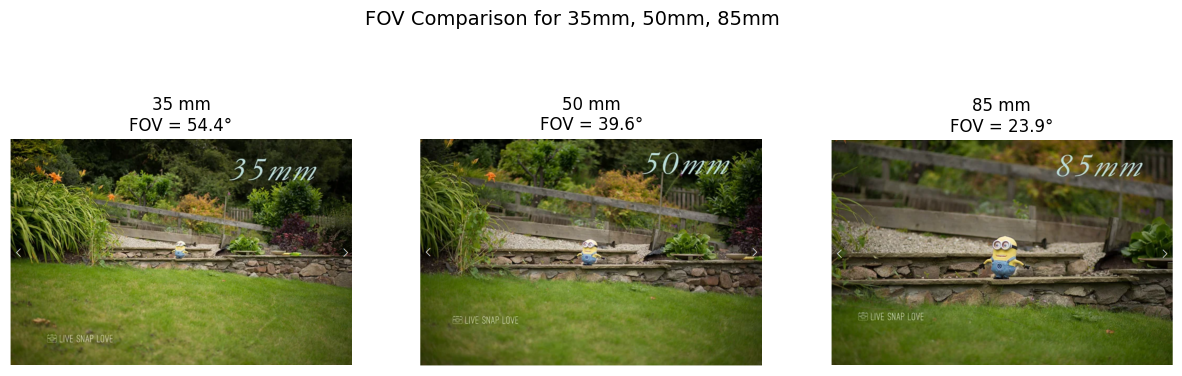

In [6]:
fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
for ax, (f, img) in zip(axs, images):
    ax.imshow(img)
    fov = calculate_fov(f)
    ax.set_title(f"{f} mm\nFOV = {fov:.1f}°")
    ax.axis('off')

plt.suptitle("FOV Comparison for 35mm, 50mm, 85mm", fontsize=14)
plt.show()

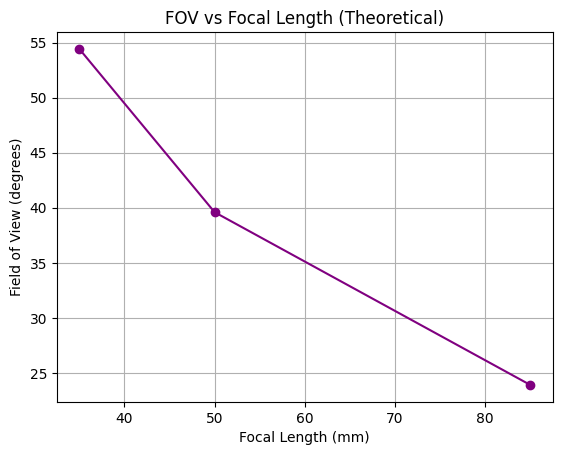

In [7]:
focal_lengths = [d["Focal Length (mm)"] for d in results]
fovs = [d["FOV (°)"] for d in results]

plt.plot(focal_lengths, fovs, 'o-', color='purple')
plt.title("FOV vs Focal Length (Theoretical)")
plt.xlabel("Focal Length (mm)")
plt.ylabel("Field of View (degrees)")
plt.grid(True)
plt.show()